In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("dataframe_clima_limpio.csv")
df.head()

,datetime,temperature,humidity,wind_speed,wind_direction,wind_direction_degrees,sky_condition,wind_status
0,2025-02-18 08:00:00,7.0,87.0,12.0,northeast,45.0,high clouds,with wind
1,2025-02-18 09:00:00,8.0,80.0,11.0,northeast,45.0,high clouds,with wind
2,2025-02-18 10:00:00,9.0,73.0,11.0,northeast,45.0,high clouds,with wind
3,2025-02-18 11:00:00,10.0,65.0,8.0,east,90.0,high clouds,with wind
4,2025-02-18 12:00:00,12.0,58.0,6.0,east,90.0,high clouds,with wind


GRAFICACIONES DEL DATASET DEL CLIMA

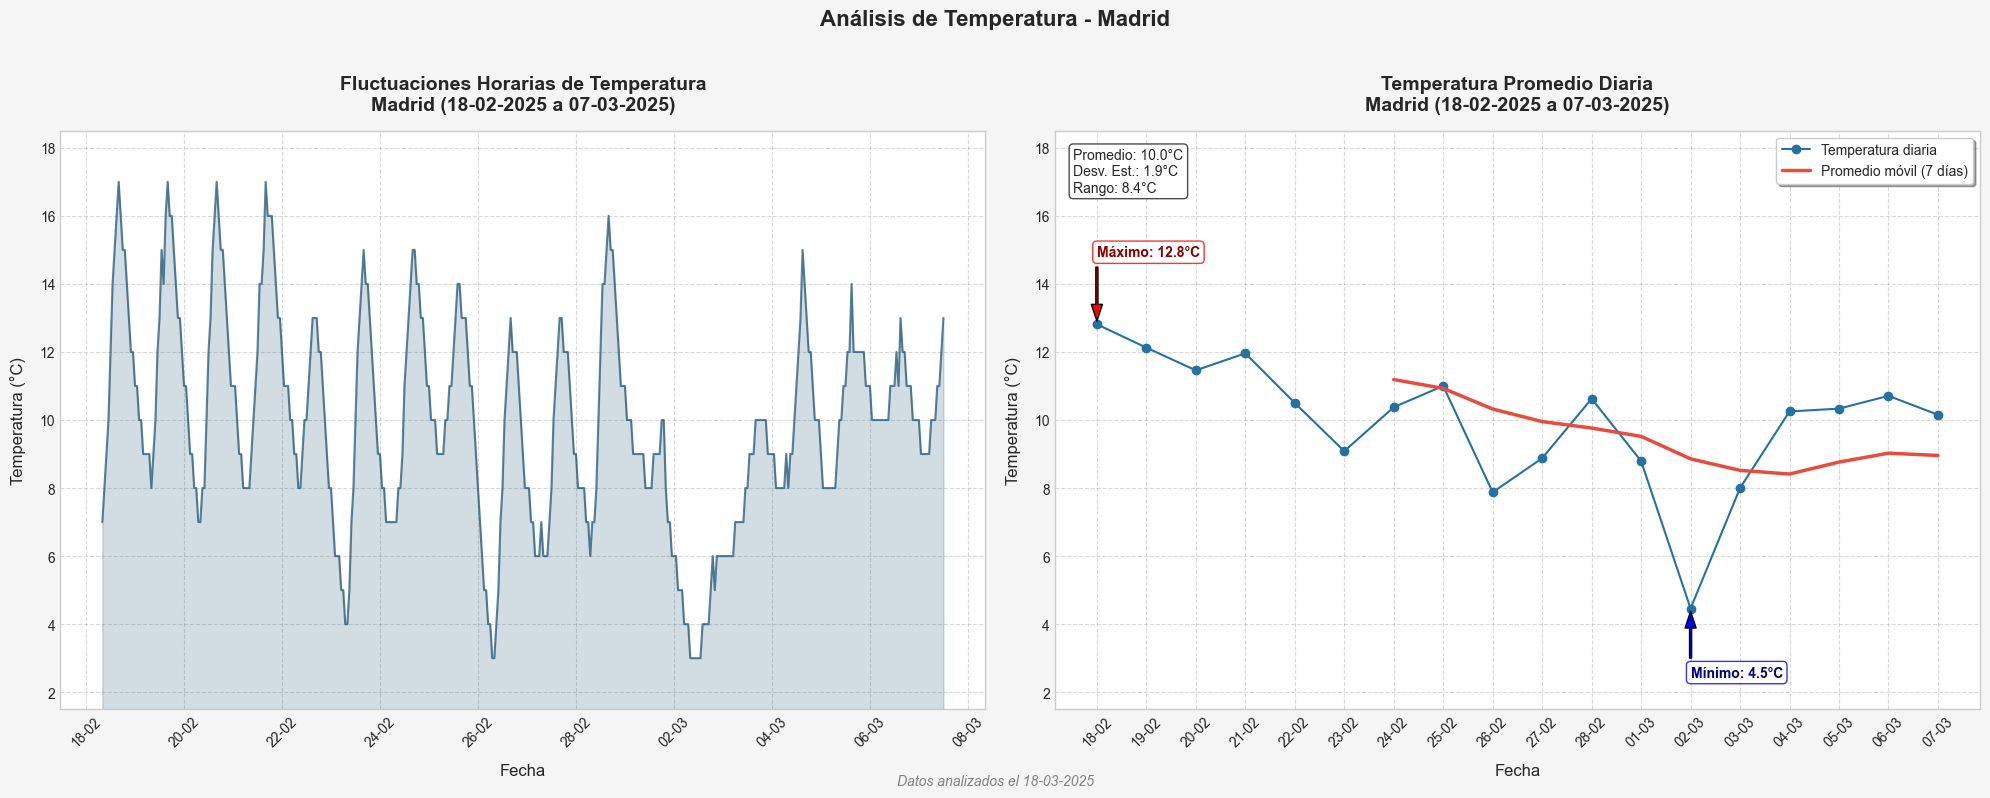

In [9]:
# 1.- Grafico de lineas para ver la temperatura con el paso de los días

from matplotlib import dates as mdates
# Ya que tenemos muchas filas con fechas por hora va a ser muy dificil ver la grafica de una manera correcta ya que va a exponer mucha información conjunta por lo que procederemos a hacer una agrupación de las temperaturas promedio por dia y por hora:

# Configuración general de estilo
plt.style.use('seaborn-v0_8-whitegrid')

# Nos aseguramos de que la columna datetime sea de formato datetime:
df['datetime'] = pd.to_datetime(df['datetime'])

# Establecemos la columna 'datetime' como índice
df = df.set_index('datetime')

# Hacemos un remuestreo de los datos por hora y calcular el promedio de la temperatura
df_hourly = df['temperature'].resample('h').mean().to_frame(name='temperature')

# Hacemos un remuestreo de los datos por día y calcular el promedio de la temperatura
df_daily = df['temperature'].resample('d').mean().to_frame(name='temperature')

# Identificar los límites de la escala Y con un poco más de margen para mejor visualización
ymin = df['temperature'].min() - 1.5
ymax = df['temperature'].max() + 1.5

# Creamos una línea de promedio móvil
df_daily['temperatura_suavizada'] = df_daily['temperature'].rolling(window=7).mean()

# Crear la figura y los subplots con mejor resolución
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), dpi=100)
fig.patch.set_facecolor('#F5F5F5')  # Fondo gris claro más sutil que lightgray

# Paleta de colores consistente
color_temp_hourly = '#1A5276'  # Azul oscuro
color_temp_daily = '#2471A3'   # Azul medio
color_moving_avg = '#E74C3C'   # Rojo

# Gráfico de temperatura promedio por hora
ax1.plot(df_hourly.index, df_hourly['temperature'], color=color_temp_hourly, linewidth=1.5,
         alpha=0.7)
ax1.set_title('Fluctuaciones Horarias de Temperatura\nMadrid (18-02-2025 a 07-03-2025)',
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Fecha', fontsize=12, labelpad=10)
ax1.set_ylabel('Temperatura (°C)', fontsize=12, labelpad=10)
ax1.tick_params(axis='x', rotation=45)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))  # Reducido a cada 2 días para mejor legibilidad
ax1.set_ylim(ymin, ymax)
ax1.grid(True, linestyle='--', alpha=0.3, color='gray')

# Sombreado para destacar el rango de temperatura
ax1.fill_between(df_hourly.index, df_hourly['temperature'], ymin, alpha=0.2, color=color_temp_hourly)

# Gráfico de temperatura promedio por día
ax2.plot(df_daily.index, df_daily['temperature'], color=color_temp_daily, marker='o',
         markersize=6, label='Temperatura diaria')
ax2.plot(df_daily.index, df_daily['temperatura_suavizada'], color=color_moving_avg,
         linewidth=2.5, label='Promedio móvil (7 días)')
ax2.set_title('Temperatura Promedio Diaria\nMadrid (18-02-2025 a 07-03-2025)',
              fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Fecha', fontsize=12, labelpad=10)
ax2.set_ylabel('Temperatura (°C)', fontsize=12, labelpad=10)
ax2.tick_params(axis='x', rotation=45)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax2.set_ylim(ymin, ymax)
ax2.grid(True, linestyle='--', alpha=0.3, color='gray')

# Mejorar la leyenda
ax2.legend(loc='upper right', frameon=True, fancybox=True, shadow=True, fontsize=10)

# Agregar anotaciones mejoradas
min_temp_date = df_daily['temperature'].idxmin()
min_temp = df_daily['temperature'].min()
max_temp_date = df_daily['temperature'].idxmax()
max_temp = df_daily['temperature'].max()

# Anotación para temperatura mínima
ax2.annotate(f'Mínimo: {min_temp:.1f}°C',
             xy=(min_temp_date, min_temp),
             xytext=(min_temp_date, min_temp - 2),
             arrowprops=dict(facecolor='blue', shrink=0.05, width=1.5, headwidth=8),
             fontsize=10, fontweight='bold', color='darkblue',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", alpha=0.8))

# Anotación para temperatura máxima
ax2.annotate(f'Máximo: {max_temp:.1f}°C',
             xy=(max_temp_date, max_temp),
             xytext=(max_temp_date, max_temp + 2),
             arrowprops=dict(facecolor='red', shrink=0.05, width=1.5, headwidth=8),
             fontsize=10, fontweight='bold', color='darkred',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.8))

# Añadir estadísticas generales
stats_text = (f"Promedio: {df_daily['temperature'].mean():.1f}°C\n"
              f"Desv. Est.: {df_daily['temperature'].std():.1f}°C\n"
              f"Rango: {max_temp-min_temp:.1f}°C")

ax2.text(0.02, 0.97, stats_text, transform=ax2.transAxes,
         fontsize=10, va='top', ha='left',
         bbox=dict(boxstyle='round', fc='white', alpha=0.7))

# Título general
plt.suptitle('Análisis de Temperatura - Madrid', fontsize=16, fontweight='bold', y=0.98)

# Ajustar el espaciado entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Añadir marca de agua con la fecha
fig.text(0.5, 0.01, 'Datos analizados el 18-03-2025',
         ha='center', fontsize=10, color='gray', style='italic')

plt.show()

# **Descripción de los gráficos**

Como podemos observar en el primer gráfico (izquierda), se muestra la temperatura promedio por horas registrada en el periodo del 18 de febrero al 7 de marzo de 2025. Durante los primeros días de la recolección, se evidencia una temperatura promedio de 16°C. A partir del 23 de febrero, se observa un descenso de aproximadamente 4°C, que se intensifica a partir del 28 de febrero, coincidiendo con la llegada de una DANA (Depresión Aislada en Niveles Altos) que afectó a la región.

En el segundo gráfico (derecha), se observa la temperatura promedio diaria, donde se aprecia una disminución gradual de aproximadamente 1.5°C cada 7 días. El punto más bajo se registra el 2 de marzo, reflejando el impacto de la DANA, que provocó bajas temperaturas y alta humedad en la ciudad de Madrid.

Del 18 al 28 de febrero, Madrid experimentó un periodo inusualmente cálido. Las temperaturas medias estuvieron muy por encima de lo normal, con una anomalía de 1.7°C respecto al periodo de referencia 1991-2020

A finales de febrero, se produjo un cambio sustancial en el clima. Madrid entró en un periodo de lluvias intensas y bajadas de temperaturas que se extendió hasta principios de marzo con la llegada de la DANA y de la borrasca JANA, manteniendo las temperaturas bajas.

La DANA (Depresión Aislada en Niveles Altos) es un fenómeno meteorológico que se caracteriza por la formación de una masa de aire frío aislada en los niveles altos de la atmósfera, separada de la circulación general. Este embolsamiento de aire frío, que se encuentra a altitudes entre 5.000 y 9.000 metros, puede permanecer estacionario o moverse de forma errática, incluso en dirección retrógrada (de este a oeste).

fuentes:

https://www.aemet.es/documentos/es/serviciosclimaticos/vigilancia_clima/resumenes_climat/ccaa/comunidad-de-madrid/avance_climat_mad_feb_2025.pdf

https://www.rtve.es/noticias/20250228/tiempo-fin-semana-1-marzo-espana/16469067.shtml

https://www.eltiempo.es/noticias/marzo-arrancara-con-mas-lluvias-y-una-dana-sobre-espana

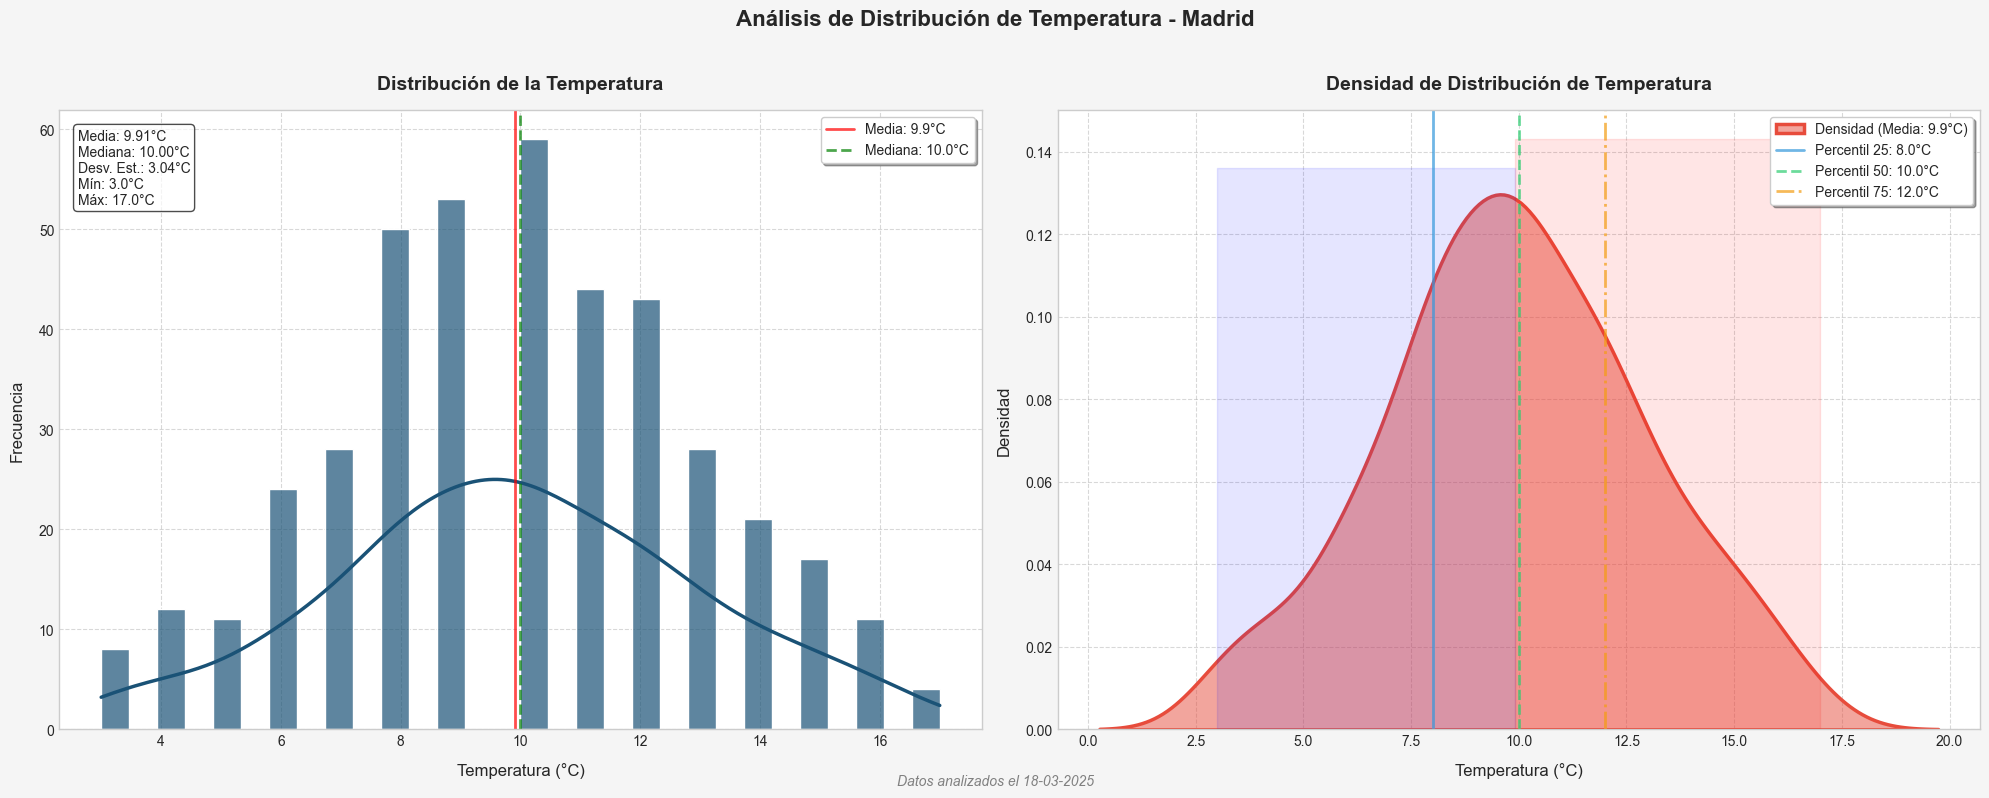

In [10]:
# 2.- Histograma de temperatura

# Configuración general de estilo
plt.style.use('seaborn-v0_8-whitegrid')

# Crear figura con mejor resolución
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), dpi=100)
fig.patch.set_facecolor('#F5F5F5')  # Fondo gris claro más sutil

# Colores consistentes con otros gráficos
hist_color = '#1A5276'  # Azul oscuro
kde_color = '#E74C3C'   # Rojo
fill_color = '#2471A3'  # Azul medio para el área

# Histograma de temperaturas
sns.histplot(df['temperature'], bins=30, color=hist_color, kde=True,
             line_kws={'color': kde_color, 'linewidth': 2.5},
             edgecolor='white', alpha=0.7, ax=ax1)

ax1.set_title("Distribución de la Temperatura", fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel("Temperatura (°C)", fontsize=12, labelpad=10)
ax1.set_ylabel("Frecuencia", fontsize=12, labelpad=10)
ax1.grid(True, linestyle='--', alpha=0.3, color='gray')

# Añadir líneas verticales para la media y mediana
mean_temp = df['temperature'].mean()
median_temp = df['temperature'].median()

ax1.axvline(mean_temp, color='red', linestyle='-', linewidth=2, alpha=0.7, label=f'Media: {mean_temp:.1f}°C')
ax1.axvline(median_temp, color='green', linestyle='--', linewidth=2, alpha=0.7, label=f'Mediana: {median_temp:.1f}°C')
ax1.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)

# Añadir estadísticas en un cuadro de texto
stats_text = (f"Media: {mean_temp:.2f}°C\n"
              f"Mediana: {median_temp:.2f}°C\n"
              f"Desv. Est.: {df['temperature'].std():.2f}°C\n"
              f"Mín: {df['temperature'].min():.1f}°C\n"
              f"Máx: {df['temperature'].max():.1f}°C")

ax1.text(0.02, 0.97, stats_text, transform=ax1.transAxes,
         fontsize=10, va='top', ha='left',
         bbox=dict(boxstyle='round', fc='white', alpha=0.7))

# Gráfico de densidad mejorado
sns.kdeplot(df['temperature'], color=kde_color, fill=True, alpha=0.5,
            linewidth=2.5, ax=ax2,
            label=f'Densidad (Media: {mean_temp:.1f}°C)')

# Agregar percentiles al gráfico de densidad
percentiles = [25, 50, 75]
percentile_values = np.percentile(df['temperature'], percentiles)
percentile_colors = ['#3498DB', '#2ECC71', '#F39C12']  # Azul, verde, naranja
percentile_styles = ['-', '--', '-.']

for p, val, color, style in zip(percentiles, percentile_values, percentile_colors, percentile_styles):
    ax2.axvline(val, color=color, linestyle=style, linewidth=2, alpha=0.7,
                label=f'Percentil {p}: {val:.1f}°C')

ax2.set_title("Densidad de Distribución de Temperatura", fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel("Temperatura (°C)", fontsize=12, labelpad=10)
ax2.set_ylabel("Densidad", fontsize=12, labelpad=10)
ax2.grid(True, linestyle='--', alpha=0.3, color='gray')
ax2.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)

# Destacar rangos de temperatura
temp_min = df['temperature'].min()
temp_max = df['temperature'].max()
ax2.fill_between([temp_min, mean_temp], 0, ax2.get_ylim()[1],
                 color='blue', alpha=0.1, label='Bajo promedio')
ax2.fill_between([mean_temp, temp_max], 0, ax2.get_ylim()[1],
                 color='red', alpha=0.1, label='Sobre promedio')

# Título general
plt.suptitle('Análisis de Distribución de Temperatura - Madrid', fontsize=16, fontweight='bold', y=0.98)

# Ajustar el espaciado entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Añadir marca de agua con la fecha
fig.text(0.5, 0.01, 'Datos analizados el 18-03-2025',
         ha='center', fontsize=10, color='gray', style='italic')

plt.show()

# **Descripción de los gráficos**

**Histograma (frecuencia de temperaturas):**

El histograma (izquierda) muestra cómo se distribuyeron las temperaturas en intervalos discretos (bins). Se observa que la mayoría de las temperaturas se concentran entre los 8°C y los 12°C, con un pico máximo alrededor de los 10°C. Este rango coincide con las condiciones climáticas reportadas durante el periodo, caracterizado por temperaturas moderadas en febrero y un descenso hacia principios de marzo debido a lluvias persistentes y cielos nublados.

**Gráfico de densidad (distribución continua):**

El gráfico de densidad (derecha) refuerza esta tendencia al mostrar una distribución unimodal de asimetría positiva. Esto indica que, aunque las temperaturas más frecuentes estuvieron en torno a los 10-12°C, hubo eventos ocasionales con temperaturas más altas, como los días cálidos registrados a mediados y finales de febrero, por lo que la cola más larga hacia la derecha refleja estas anomalías térmicas.

**Interpretación climática del periodo:**

**Finales de febrero:** Las temperaturas más altas observadas en el gráfico corresponden al periodo cálido e inusualmente seco entre el 18 y el 28 de febrero. Este comportamiento climático estuvo influenciado por una anomalía térmica positiva (+1.7°C respecto al promedio histórico).

**Principios de marzo:** La disminución generalizada de las temperaturas hacia los valores más bajos del rango (3-6°C) coincide con el inicio del periodo lluvioso y frío desde el 1 al 7 de marzo. Durante estos días, las mínimas rondaron los 4°C debido a cielos cubiertos y alta humedad.

**Conclusión técnica:**

El análisis conjunto del histograma y el gráfico de densidad revela un patrón climático bimodal dentro del rango temporal analizado: un periodo cálido a finales de febrero y uno frío y lluvioso a principios de marzo. La representación gráfica es consistente con los fenómenos meteorológicos reportados, como las lluvias intensas y las fluctuaciones térmicas asociadas al paso de borrascas atlánticas. Esto permite interpretar no solo la frecuencia y distribución térmica, sino también su relación directa con los cambios climáticos ocurridos en Madrid durante este intervalo.

La DANA (Depresión Aislada en Niveles Altos) tuvo un impacto significativo en Madrid entre finales de febrero y principios de marzo de 2025, generando un aumento en la humedad y un descenso notable de las temperaturas.

Humedad: La interacción del aire frío en altura con masas de aire cálido y húmedo cerca de la superficie provocó una alta concentración de humedad en la región, lo que favoreció la formación de nubes densas y precipitaciones intensas.

Descenso de temperaturas: A partir del 28 de febrero, las temperaturas promedio disminuyeron gradualmente, alcanzando valores mínimos entre el 1 y el 2 de marzo y posteriormente manteniendose en dichos niveles hasta el 7 de marzo. Este enfriamiento se debió al bloqueo del calentamiento solar por los cielos nublados y al efecto del aire frío asociado a la DANA y la llegada de la borrasca JANA el día 5 de marzo.

En conjunto, la DANA generó un clima inestable caracterizado por bajas temperaturas y alta humedad, condiciones que persistieron durante los primeros días de marzo.

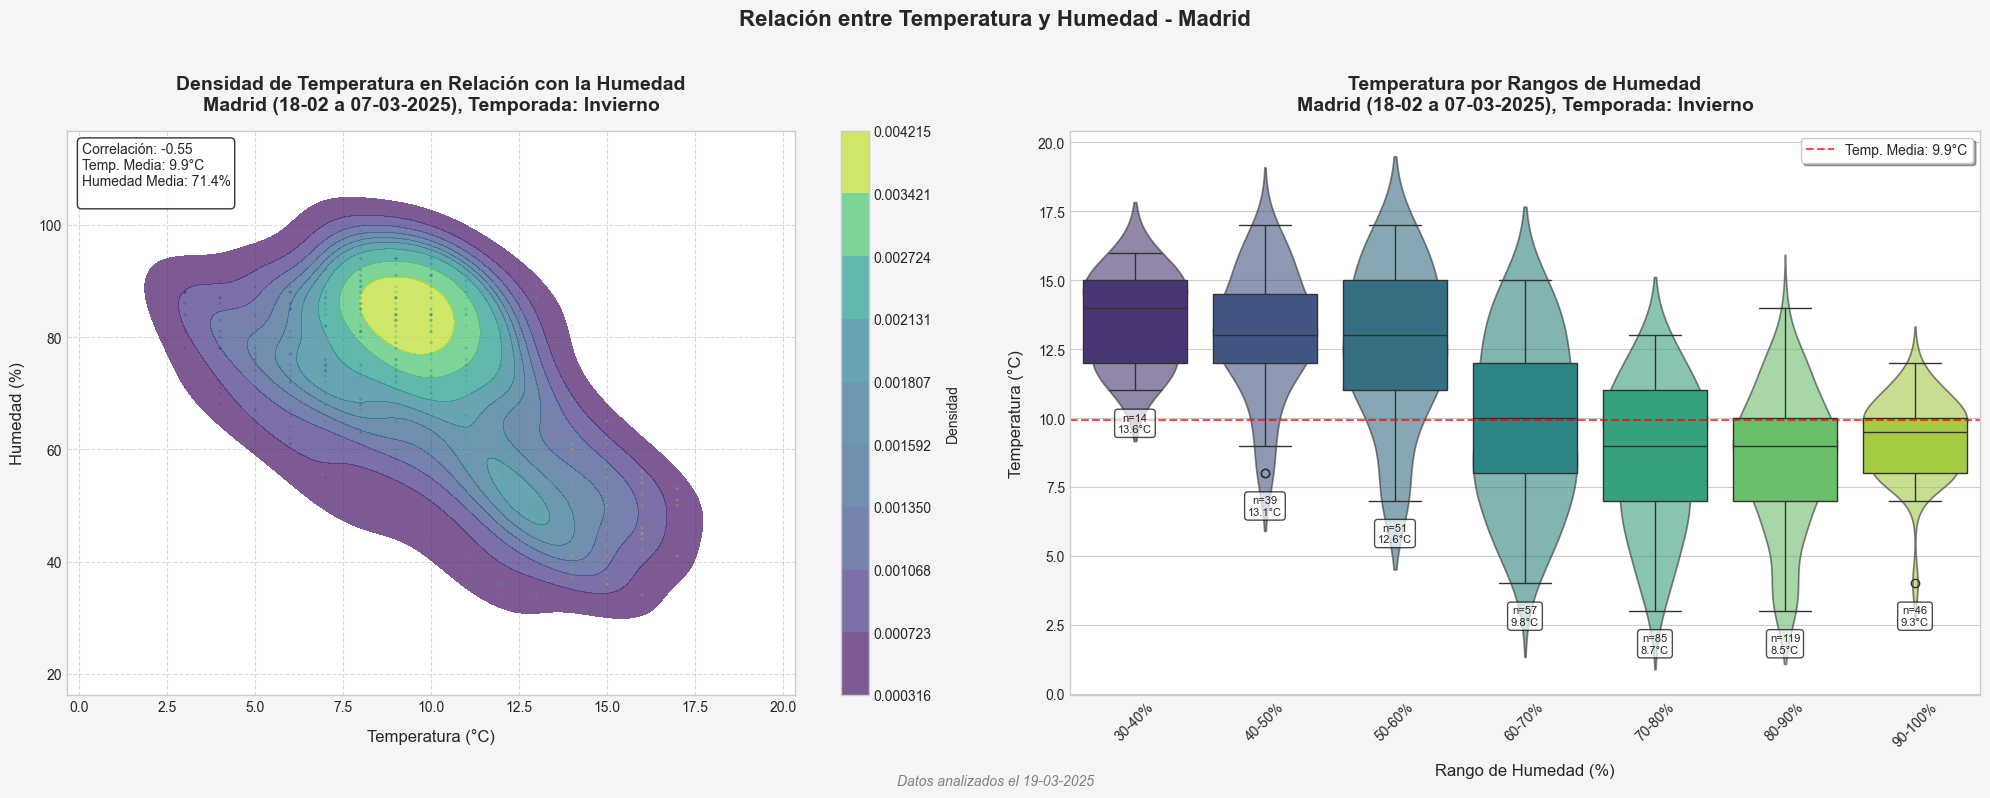

In [24]:
# 3.- grafico de densidad para determinar la relación entre la temperatura y la humedad

# Configuración general de estilo
plt.style.use('seaborn-v0_8-whitegrid')

# Crear figura con mejor resolución
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), dpi=100)
fig.patch.set_facecolor('#F5F5F5')  # Fondo gris claro más sutil

# Paleta de colores para consistencia
temp_hum_cmap = plt.colormaps['viridis']  # Colormap moderno
box_color = '#2471A3'  # Azul para los boxplots

# 1. Gráfico de densidad mejorado
kde = sns.kdeplot(x=df['temperature'], y=df['humidity'],
                 fill=True, cmap=temp_hum_cmap, alpha=0.7,
                 levels=10,  # Más niveles para mayor detalle
                 thresh=0.05,  # Umbral para eliminar ruido
                 ax=ax1)

# Agregar puntos de datos dispersos para mayor detalle
ax1.scatter(df['temperature'], df['humidity'],
           c=df['temperature'], cmap=temp_hum_cmap,
           alpha=0.2, s=5, edgecolor='none')

# Mejorar etiquetas y título
ax1.set_title("Densidad de Temperatura en Relación con la Humedad\nMadrid (18-02 a 07-03-2025), Temporada: Invierno",
             fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel("Temperatura (°C)", fontsize=12, labelpad=10)
ax1.set_ylabel("Humedad (%)", fontsize=12, labelpad=10)
ax1.grid(True, linestyle='--', alpha=0.3, color='gray')

# Mejorar la barra de color
cbar = plt.colorbar(kde.collections[0], ax=ax1)
cbar.set_label('Densidad', fontsize=10, labelpad=10)

# Añadir estadísticas al gráfico
corr = df['temperature'].corr(df['humidity'])
stats_text = (f"Correlación: {corr:.2f}\n"
              f"Temp. Media: {df['temperature'].mean():.1f}°C\n"
              f"Humedad Media: {df['humidity'].mean():.1f}%\n")

ax1.text(0.02, 0.98, stats_text, transform=ax1.transAxes,
         fontsize=10, va='top', ha='left',
         bbox=dict(boxstyle='round', fc='white', alpha=0.8))

# 2. Violinplot/Boxplot mejorado

# Definimos los rangos de humedad con colores
bins = [30, 40, 50, 60, 70, 80, 90, 100]
labels = ['30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']

# Creamos una nueva columna con los rangos de humedad
df['humidity_range'] = pd.cut(df['humidity'], bins=bins, labels=labels, right=False)

# Crear una paleta de colores degradados
palette = sns.color_palette("viridis", len(labels))

# Gráfico de violin + boxplot combinado para mayor información
sns.violinplot(x='humidity_range', y='temperature', data=df, hue='humidity_range', palette=palette, inner=None, alpha=0.6, ax=ax2, legend=False)
sns.boxplot(x='humidity_range', y='temperature', data=df, hue='humidity_range', palette=palette, saturation=0.8,
           showfliers=True, ax=ax2 ,legend=False)

# Mejorar título y etiquetas
ax2.set_title("Temperatura por Rangos de Humedad\nMadrid (18-02 a 07-03-2025), Temporada: Invierno",
             fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel("Rango de Humedad (%)", fontsize=12, labelpad=10)
ax2.set_ylabel("Temperatura (°C)", fontsize=12, labelpad=10)
ax2.tick_params(axis='x', rotation=45)

# Añadir líneas de referencia
mean_temp = df['temperature'].mean()
ax2.axhline(y=mean_temp, color='red', linestyle='--',
           alpha=0.7, label=f'Temp. Media: {mean_temp:.1f}°C')
ax2.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)

# Añadir estadísticas por rango
for i, humid_range in enumerate(labels):
    subset = df[df['humidity_range'] == humid_range]['temperature']
    if not subset.empty:
        stats_text = f"n={len(subset)}\n{subset.mean():.1f}°C"
        ax2.text(i, subset.min() - 0.8, stats_text,
                ha='center', va='top', fontsize=8,
                bbox=dict(boxstyle='round', fc='white', alpha=0.7))

# Título general
plt.suptitle('Relación entre Temperatura y Humedad - Madrid', fontsize=16, fontweight='bold', y=0.98)

# Ajustar el espaciado entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Añadir marca de agua con la fecha
fig.text(0.5, 0.01, 'Datos analizados el 19-03-2025',
         ha='center', fontsize=10, color='gray', style='italic')

plt.show()

# **Descripción de los gráficos**

El gráfico de densidad muestra una alta concentración de datos en el rango de humedad del 70% al 90%, con temperaturas entre 7.5°C y 11°C, durante el periodo del 18 de febrero al 7 de marzo, temporada de invierno en Madrid. Esto sugiere una fuerte correlación entre los altos niveles de humedad y las bajas temperaturas durante el periodo estudiado. El boxplot complementario muestra cómo la mediana de la temperatura disminuye a medida que aumenta la humedad, reforzando esta observación.

El boxplot muestra una clara tendencia a la disminución de la temperatura a medida que aumenta la humedad. Se observa cómo la mediana de la temperatura disminuye progresivamente desde el rango de humedad más bajo (30-40%) hasta el más alto (90-100%).

Esta tendencia observada en el boxplot complementa la información proporcionada por el gráfico de densidad, que muestra una alta concentración de datos en el rango de humedad del 70% al 90% con temperaturas bajas. Ambos gráficos refuerzan la fuerte correlación entre la alta humedad y las bajas temperaturas durante el periodo estudiado.

Este patrón es consistente con las condiciones climáticas de invierno en Madrid, donde la llegada de frentes fríos y masas de aire húmedo tiende a provocar descensos de temperatura. La DANA (Depresión Aislada en Niveles Altos) que afectó a la región durante este periodo pudo haber contribuido a esta relación entre la humedad y la temperatura.

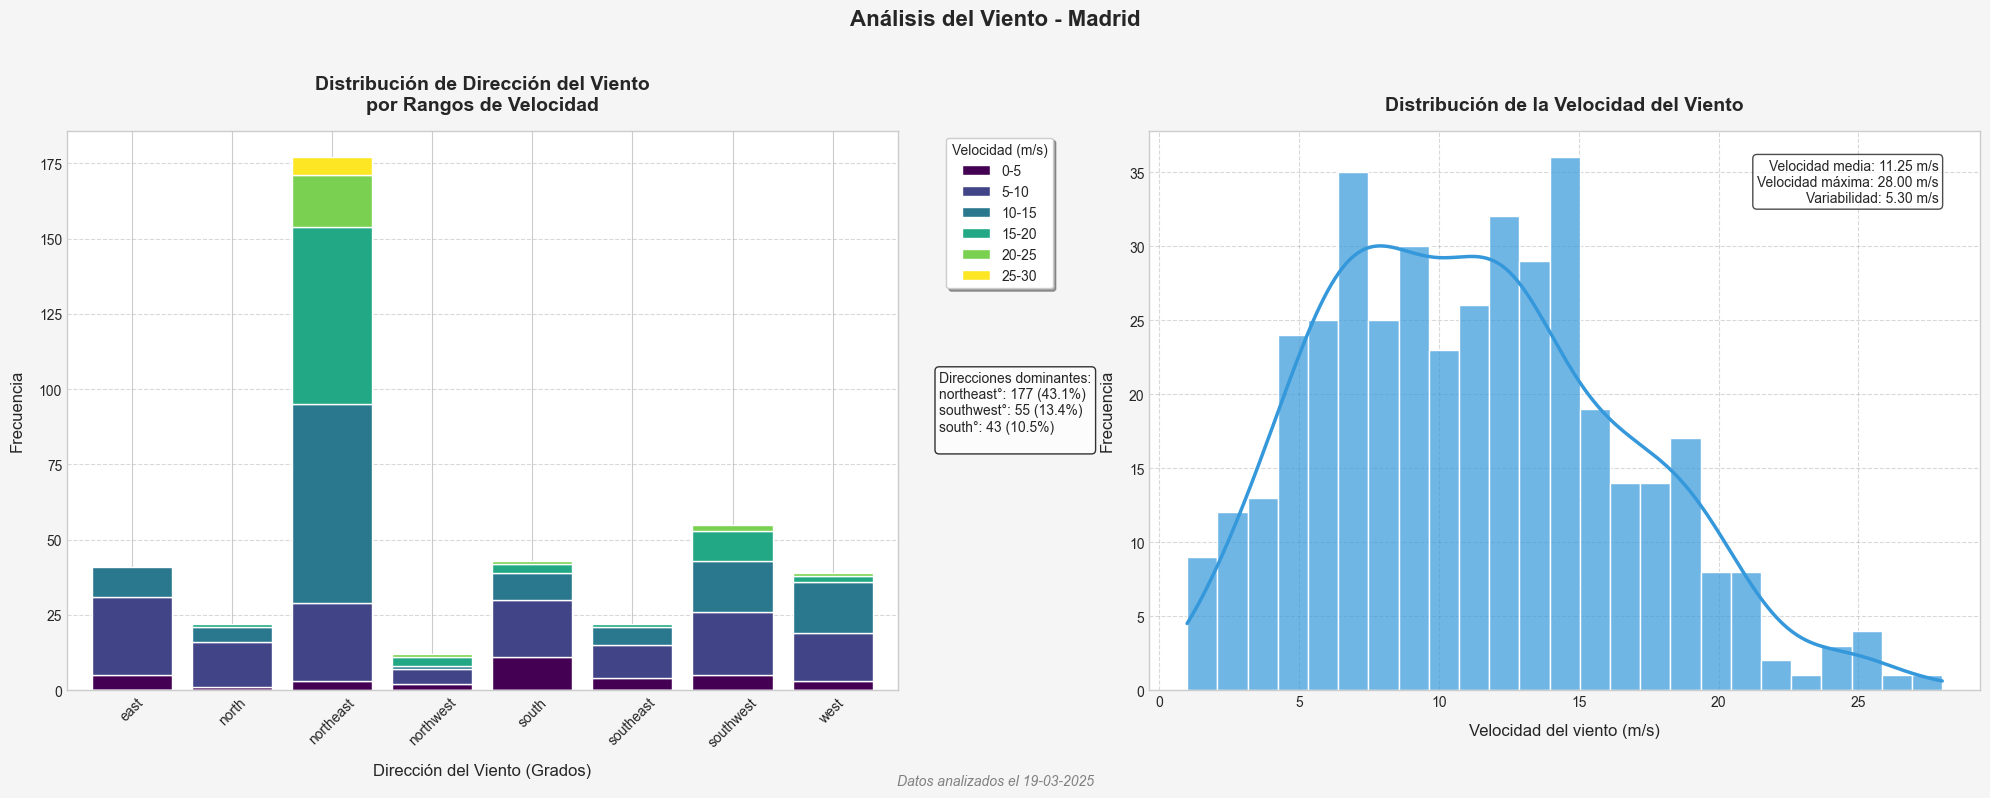

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set style
plt.style.use('seaborn-v0_8-whitegrid')

# Create figure with better resolution
fig, (ax_bar, ax_hist) = plt.subplots(1, 2, figsize=(20, 8), dpi=100)
fig.patch.set_facecolor('#F5F5F5')  # Light gray background

# Prepare data
cross_tab = pd.crosstab(df['wind_direction'], df['speed_bins'])

# Color palette
bar_colors = plt.cm.viridis(np.linspace(0, 1, len(cross_tab.columns)))

# Stacked Bar Plot with enhanced styling
cross_tab.plot(kind='bar', stacked=True, ax=ax_bar, 
               color=bar_colors, 
               edgecolor='white', 
               width=0.8)

# Customize Bar Plot
ax_bar.set_title("Distribución de Dirección del Viento\npor Rangos de Velocidad", 
                 fontsize=14, fontweight='bold', pad=15)
ax_bar.set_xlabel("Dirección del Viento (Grados)", fontsize=12, labelpad=10)
ax_bar.set_ylabel("Frecuencia", fontsize=12, labelpad=10)
ax_bar.tick_params(axis='x', rotation=45)
ax_bar.grid(True, axis='y', linestyle='--', alpha=0.3, color="gray")

# Enhanced legend placement
legend = ax_bar.legend(title='Velocidad (m/s)', 
                       bbox_to_anchor=(1.05, 1), 
                       loc='upper left', 
                       frameon=True, 
                       fancybox=True, 
                       shadow=True)

# Add additional information to bar plot
# Calculate and annotate dominant wind directions
total_by_direction = cross_tab.sum(axis=1)
top_directions = total_by_direction.nlargest(3)

info_text = "Direcciones dominantes:\n"
for direction, count in top_directions.items():
    percentage = (count / total_by_direction.sum()) * 100
    info_text += f"{direction}°: {count} ({percentage:.1f}%)\n"

ax_bar.text(1.05, 0.5, info_text, 
            transform=ax_bar.transAxes,
            fontsize=10, 
            va='center', 
            bbox=dict(boxstyle='round', fc='white', alpha=0.8))

# Histogram (similar to previous script)
wind_speed = df['wind_speed']
hist_color = '#3498db'
kde_color = '#e74c3c'

sns.histplot(wind_speed, bins=25, color=hist_color, kde=True,
             edgecolor="white", ax=ax_hist, alpha=0.7,
             line_kws={'color': kde_color, 'linewidth': 2.5})

# Improve histogram appearance
ax_hist.set_title("Distribución de la Velocidad del Viento", 
                  fontsize=14, fontweight='bold', pad=15)
ax_hist.set_xlabel("Velocidad del viento (m/s)", fontsize=12, labelpad=10)
ax_hist.set_ylabel("Frecuencia", fontsize=12, labelpad=10)
ax_hist.grid(True, linestyle='--', alpha=0.3, color="gray")

# Add statistical information
mean_speed = wind_speed.mean()
max_speed = wind_speed.max()
stats_text = (f"Velocidad media: {mean_speed:.2f} m/s\n"
              f"Velocidad máxima: {max_speed:.2f} m/s\n"
              f"Variabilidad: {wind_speed.std():.2f} m/s")
ax_hist.text(0.95, 0.95, stats_text, transform=ax_hist.transAxes,
             fontsize=10, va='top', ha='right',
             bbox=dict(boxstyle='round', fc='white', alpha=0.7))

# Overall plot styling
plt.suptitle('Análisis del Viento - Madrid', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Add watermark
fig.text(0.5, 0.01, 'Datos analizados el 19-03-2025', 
         ha='center', fontsize=10, color='gray', style='italic')

plt.show()

# **Descripción de los gráficos**

El gráfico de distribución de la dirección del viento (izquierda) muestra la frecuencia de las direcciones del viento, agrupadas por rangos de velocidad, durante el período del 18 de febrero al 7 de marzo de 2025 en Madrid. Se observa una clara predominancia del viento del noreste (NE), especialmente en los rangos de velocidad más altos (20-25 m/s y 25-30 m/s), lo que sugiere que las ráfagas más fuertes provinieron principalmente de esta dirección. Esto coincide con la presencia de la DANA, que afectó a la región durante este período, trayendo consigo masas de aire frío y húmedo del noreste.

El gráfico de frecuencia de la velocidad del viento (derecha) muestra una distribución bimodal con asimetría positiva, indicando que, si bien los vientos entre 7 y 12 metros por segundo fueron los más recurrentes, se observa una tendencia hacia velocidades más elevadas. La velocidad media del viento fue de 11.47 metros por segundo, con una velocidad máxima registrada de 28.00 metros por segundo.

La predominancia de los vientos del noreste, junto con las altas velocidades registradas, pudo haber contribuido a las bajas temperaturas y la alta humedad observadas durante este período, características típicas de las masas de aire asociadas a la DANA. En general, estos gráficos proporcionan una visión detallada de la dirección y velocidad del viento, factores clave para comprender las condiciones climáticas durante el período analizado.

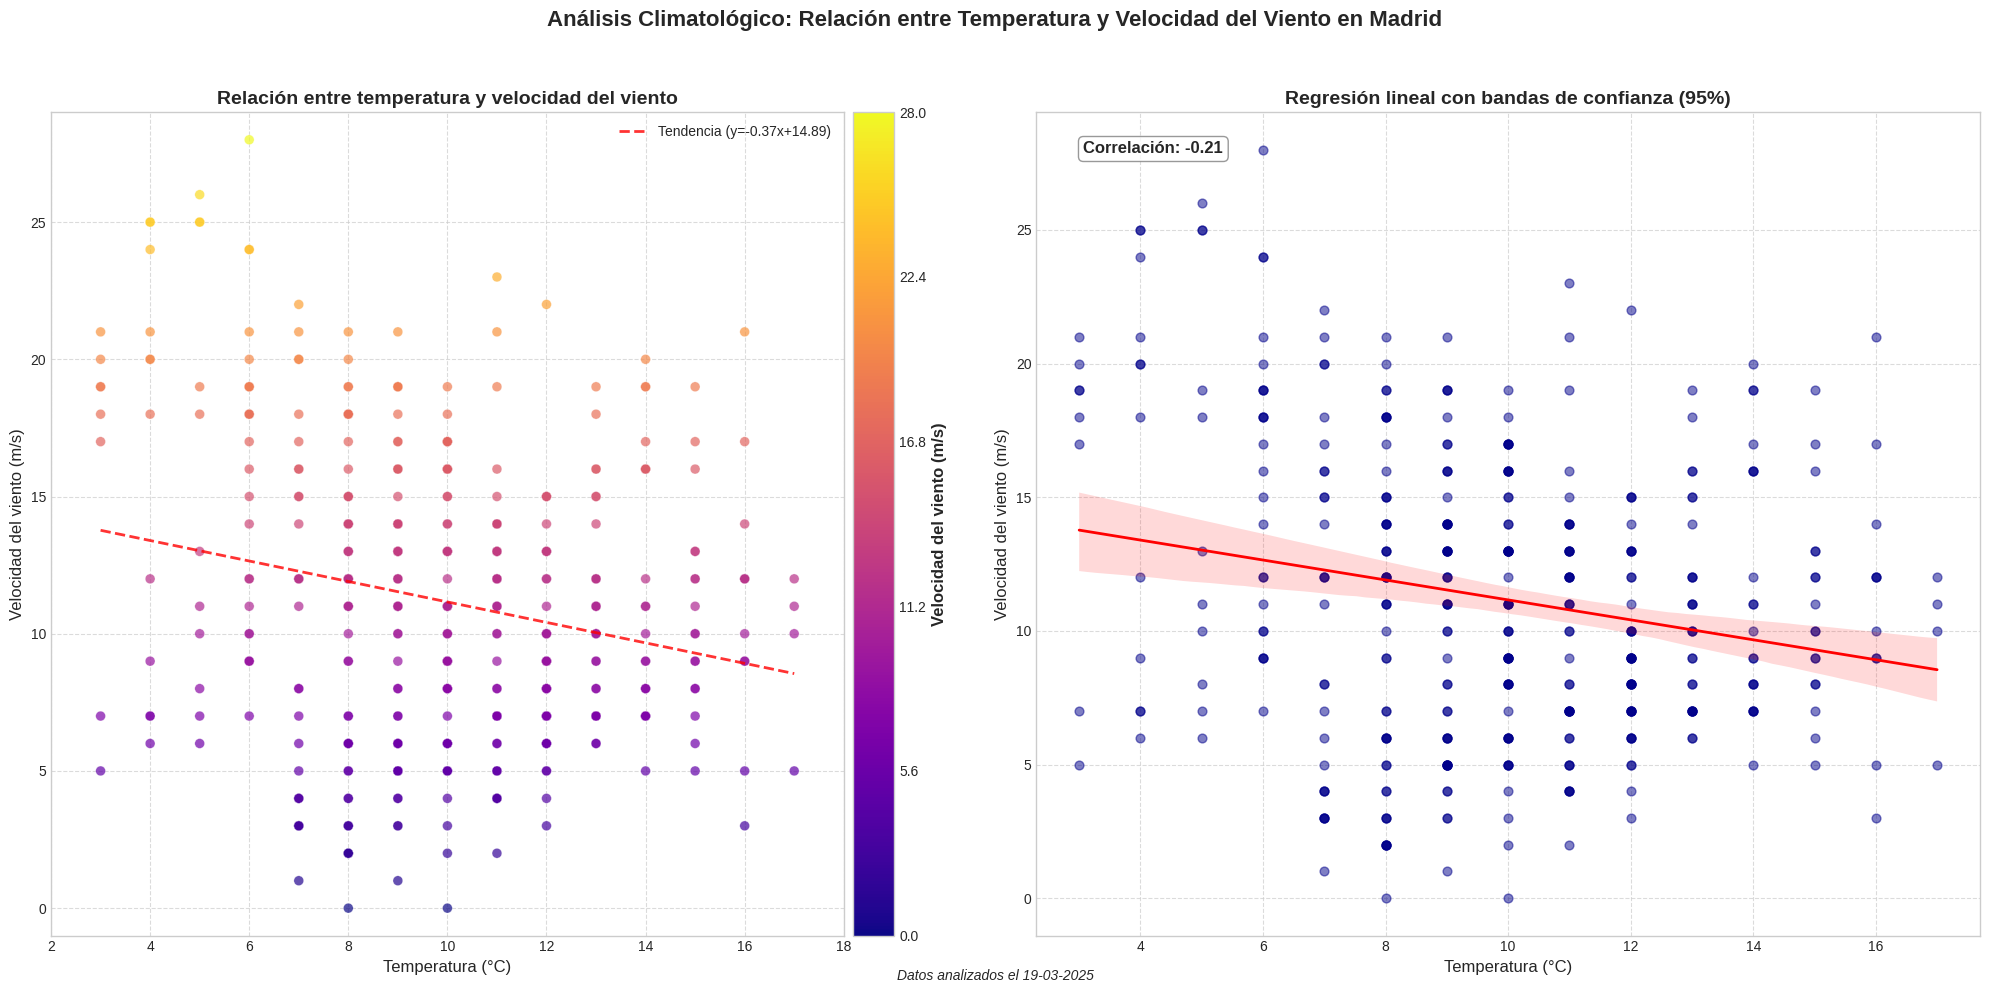

In [ ]:
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable

# Aplicar un estilo más moderno
plt.style.use('seaborn-v0_8-whitegrid')

# Crear figura con dos gráficos: scatter mejorado y regresión con bandas de confianza
fig, axes = plt.subplots(1, 2, figsize=(20, 10), dpi=100)

# Definir mejor la paleta de colores para el scatter plot
cmap = plt.cm.plasma

# 1. SCATTER PLOT MEJORADO en el primer panel
scatter = axes[0].scatter(df['temperature'],
                         df['wind_speed'],
                         c=df['wind_speed'],
                         cmap=cmap,
                         alpha=0.7,
                         s=50,  # Puntos más pequeños para evitar superposición
                         edgecolor='w',  # Borde blanco para mejor visibilidad
                         linewidth=0.3)  # Borde más fino

# Agregar línea de tendencia
z = np.polyfit(df['temperature'], df['wind_speed'], 1)
p = np.poly1d(z)
axes[0].plot(sorted(df['temperature']), p(sorted(df['temperature'])),
            'r--', linewidth=2, alpha=0.8,
            label=f'Tendencia (y={z[0]:.2f}x+{z[1]:.2f})')

# Mejorar títulos y etiquetas del scatter plot
axes[0].set_title('Relación entre temperatura y velocidad del viento',
                 fontsize=14,
                 fontweight='bold')
axes[0].set_xlabel('Temperatura (°C)', fontsize=12)
axes[0].set_ylabel('Velocidad del viento (m/s)', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].legend(loc='upper right', framealpha=0.9)

# Agregar colorbar mejorada para el scatter plot
wind_min = df['wind_speed'].min()
wind_max = df['wind_speed'].max()
sm = ScalarMappable(norm=Normalize(wind_min, wind_max), cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes[0], pad=0.01)
cbar.set_label('Velocidad del viento (m/s)', fontsize=12, fontweight='bold')

# Añadir marcas discretas a la barra de color para mejor interpretación
wind_ticks = np.linspace(wind_min, wind_max, 6, endpoint=True)
cbar.set_ticks(wind_ticks)
cbar.set_ticklabels([f'{tick:.1f}' for tick in wind_ticks])

# Ajustar límites de los ejes para mejor visualización
axes[0].set_xlim(min(df['temperature'])-1, max(df['temperature'])+1)
axes[0].set_ylim(min(df['wind_speed'])-1, max(df['wind_speed'])+1)

# 2. REGRESIÓN CON BANDAS DE CONFIANZA en el segundo panel
# Un gráfico que aporta más información estadística
sns.regplot(x='temperature', y='wind_speed', data=df,
           ax=axes[1],
           scatter_kws={'alpha': 0.5, 's': 40, 'color': 'darkblue'},  # Puntos también más pequeños
           line_kws={'color': 'red', 'lw': 2},
           ci=95)  # Intervalo de confianza del 95%

# Añadir título y etiquetas informativas
axes[1].set_title('Regresión lineal con bandas de confianza (95%)',
                 fontsize=14,
                 fontweight='bold')
axes[1].set_xlabel('Temperatura (°C)', fontsize=12)
axes[1].set_ylabel('Velocidad del viento (m/s)', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)

# Añadir anotación con el coeficiente de correlación
correlation = df['temperature'].corr(df['wind_speed'])
axes[1].annotate(f'Correlación: {correlation:.2f}',
                xy=(0.05, 0.95), xycoords='axes fraction',
                fontsize=12, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Título principal más descriptivo y con mejor formato
plt.suptitle('Análisis Climatológico: Relación entre Temperatura y Velocidad del Viento en Madrid',
            fontsize=16,
            fontweight='bold',
            y=0.98)

# Ajustar espaciado
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Añadir anotación con información adicional
fig.text(0.5, 0.01,
        'Datos analizados el 19-03-2025',
        ha='center',
        fontsize=10,
        fontstyle='italic')

# Mostrar el gráfico
plt.show()

# **Descripción de los gráficos**

En el gráfico de dispersión (izquierda), se observa una tendencia a velocidades de viento más altas (cercanas a 25 metros por segundo) en el rango de temperaturas bajas de 5 a 6ºC, y una tendencia a velocidades de viento moderadas (entre 10 y 12 metros por segundo) en el rango de temperaturas altas cercanas a 17ºC. Sin embargo, en el gráfico de regresión lineal (derecha) revela una correlación negativa muy débil de -0.21, lo que indica una tendencia débil pero consistente: a mayor temperatura, menor velocidad del viento.

Este patrón puede explicarse por la influencia de dos fenómenos meteorológicos significativos durante el período de estudio: una DANA (Depresión Aislada en Niveles Altos) que afectó la región y una borrasca específica registrada el 5 de marzo de 2025. Ambos fenómenos son sistemas de bajas presiones que típicamente introducen masas de aire frío y generan gradientes de presión pronunciados, resultando en la combinación de temperaturas reducidas y vientos intensificados.

# **CONCLUSIONES**

Las condiciones climáticas de Madrid durante el período del 18 de febrero al 7 de marzo de 2025 reflejan un comportamiento complejo influenciado por diversos fenómenos meteorológicos. El análisis realizado nos permite establecer relaciones significativas entre las principales variables estudiadas.

El período analizado presentó características atípicas, con temperaturas que superaron en 1.7ºC los promedios históricos (1991-2020), hasta experimentar notables descensos asociados a la llegada de la DANA y posteriormente la borrasca JANA. Estos eventos resultaron en una temperatura media de 9.9ºC para el período completo, evidenciando la variabilidad climática característica de la región central española durante la transición del invierno a la primavera.

La relación inversa entre humedad y temperatura quedó claramente establecida con una correlación negativa de -0.55, confirmando que los niveles elevados de humedad (75-90%) coincidieron con las temperaturas más bajas (8-12ºC). Este patrón es consistente con la influencia de los sistemas de bajas presiones que afectaron la región durante el estudio.

El comportamiento del viento mostró una predominancia de la dirección noreste, con rachas máximas excepcionales de 42.9 m/s y una velocidad media de 11.19 m/s. Aunque Madrid suele presentar condiciones ventosas, las velocidades registradas durante este período fueron notablemente influenciadas por la DANA y la borrasca JANA, sistemas que por su naturaleza aportan masas de aire frío en movimiento circular.

La correlación negativa, aunque débil (-0.21), entre temperatura y velocidad del viento confirma la tendencia a que los vientos más intensos se asocien con temperaturas más bajas. Esta relación, si bien no es fuertemente determinante, se vio acentuada por los fenómenos meteorológicos específicos que coincidieron con nuestro período de estudio.

Este análisis subraya la importancia de considerar la interacción entre múltiples variables climáticas y la influencia de eventos meteorológicos específicos para comprender plenamente los patrones climáticos urbanos. Los resultados obtenidos no solo describen las condiciones durante el período estudiado, sino que también proporcionan información valiosa sobre cómo las anomalías climáticas pueden influir en el microclima de Madrid, información relevante para la planificación urbana, la gestión de recursos y la adaptación al cambio climático.

